In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
columns = ["Pregnancies", "GLucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv('./master_pima-indians-diabetes.csv')
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
array = dataset.values
X = array[:, 0:8]
y = array[:, 8]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Feature Selection Algorithms

### Univariate Analysis

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [7]:
np.set_printoptions(precision=3)
features = fit.transform(X)

In [8]:
print("Scores: ")
print(fit.scores_)

Scores: 
[ 110.727 1406.59    17.505   51.008 2219.398  127.671    5.356  178.011]


In [9]:
print("Features: ")
print(features[0:5, :])

Features: 
[[ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]
 [116.    0.   25.6  30. ]]


### Recursive Feature Elimination

In [10]:
from sklearn.feature_selection import RFE

In [11]:
array = dataset.values
X = array[:, 0:8]
y = array[:, 8]

In [12]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X,y)

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [13]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 5 4 1 1 2]


In [14]:
reduced_dataset = dataset.iloc[:, :8].loc[:, fit.support_]
reduced_dataset.head()

,6,148,33.6,0.627
0,1,85,26.6,0.351
1,8,183,23.3,0.672
2,1,89,28.1,0.167
3,0,137,43.1,2.288
4,5,116,25.6,0.201


### Lasso - L1 Regularization

In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [18]:
lasso_coefficients = lasso.coef_

In [19]:
selected_features = [feature for feature, coef in zip(columns, lasso_coefficients) if coef != 0]
print("Selected Features:", selected_features)

Selected Features: ['Pregnancies', 'GLucose', 'BloodPressure', 'Skin Thickness', 'BMI', 'Age']


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
rf_importances = rf_model.feature_importances_

In [23]:
sorted_indices = rf_importances.argsort()[::-1]
selected_features_rf = np.array(columns)[sorted_indices]

In [24]:
print("Feature Importances (Random Forest):")
for feature, importance in zip(selected_features_rf, rf_importances[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

Feature Importances (Random Forest):
GLucose: 0.2590
BMI: 0.1503
Age: 0.1357
DiabetesPedigreeFunction: 0.1280
Pregnancies: 0.0976
BloodPressure: 0.0871
Insulin: 0.0768
Skin Thickness: 0.0655


### XGBoost

In [25]:
import xgboost as xgb

In [26]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [27]:
xgb_importances = xgb_model.feature_importances_

In [28]:
sorted_indices = xgb_importances.argsort()[::-1]
selected_features_xgb = np.array(columns)[sorted_indices]

In [29]:
print("Feature Importances (XGBoost):")
for feature, importance in zip(selected_features_xgb, xgb_importances[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

Feature Importances (XGBoost):
GLucose: 0.2428
Age: 0.1437
BMI: 0.1319
Pregnancies: 0.1155
Skin Thickness: 0.1063
Insulin: 0.1061
DiabetesPedigreeFunction: 0.0844
BloodPressure: 0.0693


## 2. Comparing Random Forest with and without feature selection

In [30]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
dataset = pd.read_csv('./master_pima-indians-diabetes.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Step 1: Train XGBoost on the original dataset
xgb_model_original = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model_original.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred_original = xgb_model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)

In [34]:
# Step 2: Feature selection using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
rf_importances = rf_model.feature_importances_
sorted_indices = rf_importances.argsort()[::-1]
selected_features_rf = np.array(X.columns)[sorted_indices]

In [36]:
top_n = 5
X_train_selected = X_train[selected_features_rf[:top_n]]
X_test_selected = X_test[selected_features_rf[:top_n]]

In [37]:
# Step 3: Train XGBoost on the reduced dataset (with feature selection)
xgb_model_selected = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model_selected.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred_selected = xgb_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)

In [39]:
print("Performance on Original Dataset:")
print(f"Accuracy: {accuracy_original:.4f}, F1-Score: {f1_original:.4f}, Precision: {precision_original:.4f}, Recall: {recall_original:.4f}")

Performance on Original Dataset:
Accuracy: 0.7446, F1-Score: 0.6380, Precision: 0.6265, Recall: 0.6500


In [40]:
print("\nPerformance on Reduced Dataset (With Feature Selection):")
print(f"Accuracy: {accuracy_selected:.4f}, F1-Score: {f1_selected:.4f}, Precision: {precision_selected:.4f}, Recall: {recall_selected:.4f}")


Performance on Reduced Dataset (With Feature Selection):
Accuracy: 0.7532, F1-Score: 0.6415, Precision: 0.6456, Recall: 0.6375


## 3. Visualizing Results

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
methods = ['Original Dataset', 'Feature Selection']
accuracies = [accuracy_original, accuracy_selected]
f1_scores = [f1_original, f1_selected]
precisions = [precision_original, precision_selected]
recalls = [recall_original, recall_selected]

In [43]:
performance_df = pd.DataFrame({
    'Method': methods,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Precision': precisions,
    'Recall': recalls
})

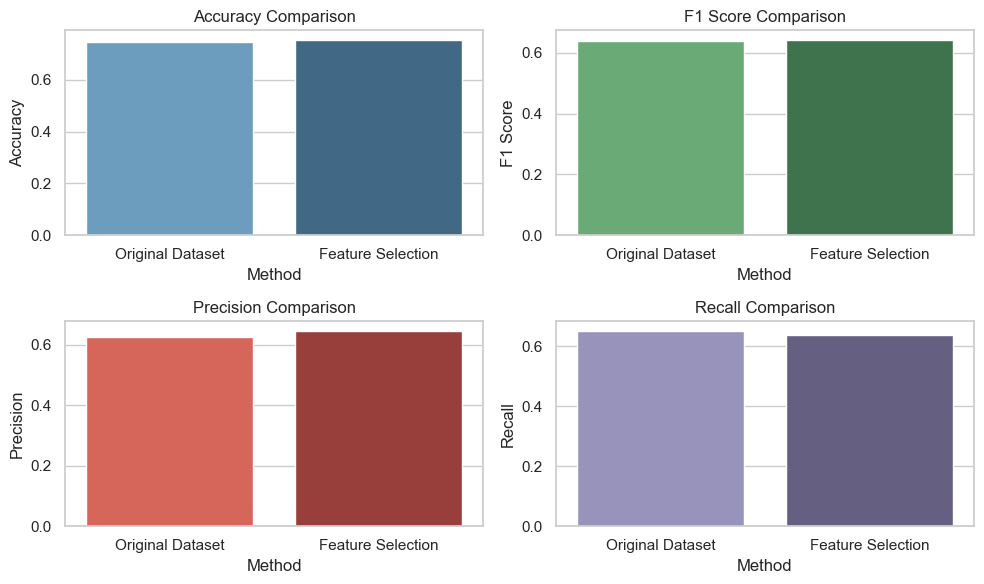

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Bar plot for accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Method', y='Accuracy', data=performance_df, hue='Method', palette="Blues_d", legend=False)
plt.title('Accuracy Comparison')

# Bar plot for F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x='Method', y='F1 Score', data=performance_df, hue='Method', palette="Greens_d", legend=False)
plt.title('F1 Score Comparison')

# Bar plot for Precision
plt.subplot(2, 2, 3)
sns.barplot(x='Method', y='Precision', data=performance_df, hue='Method', palette="Reds_d", legend=False)
plt.title('Precision Comparison')

# Bar plot for Recall
plt.subplot(2, 2, 4)
sns.barplot(x='Method', y='Recall', data=performance_df, hue='Method', palette="Purples_d", legend=False)
plt.title('Recall Comparison')

plt.tight_layout()
plt.show()